In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("IPL Matches 2008-2020.csv")

In [3]:
table = df.head()
table.style.set_properties(**{'background-color': '#354161', 
                           'color': '#f261a6','height':'120px','':'white'})

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.000000,N,nan,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.000000,N,nan,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.000000,N,nan,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.000000,N,nan,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.000000,N,nan,BF Bowden,K Hariharan


In [4]:
df.shape

(812, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812 entries, 0 to 811
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               812 non-null    int64  
 1   city             799 non-null    object 
 2   date             812 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            812 non-null    object 
 5   neutral_venue    812 non-null    int64  
 6   team1            812 non-null    object 
 7   team2            812 non-null    object 
 8   toss_winner      812 non-null    object 
 9   toss_decision    812 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          812 non-null    object 
 16  umpire2          812 non-null    object 
dtypes: float64(1), i

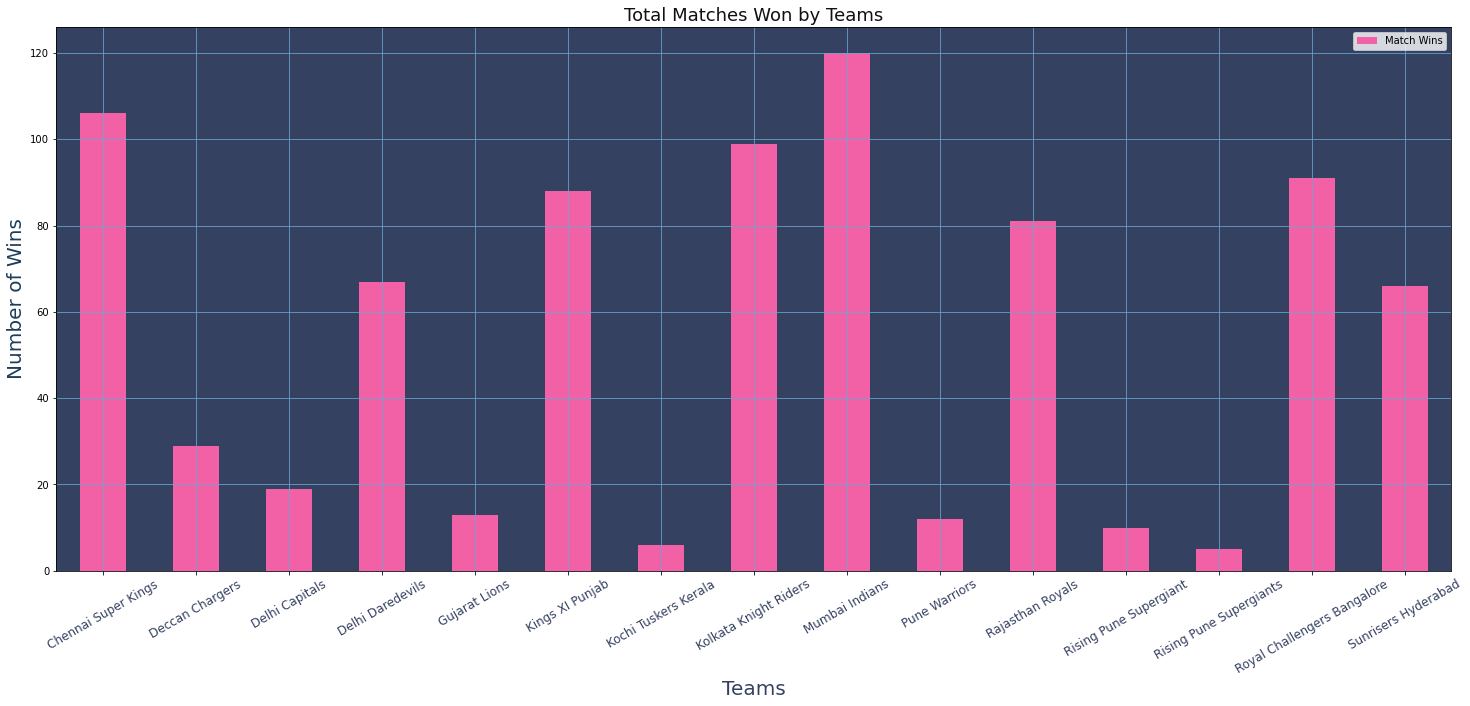

In [6]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()


legendlist = list((sorted(set(df['winner']))))

#print(legendlist)
#print(df['winner'].value_counts().sort_index())
df['winner'].value_counts().sort_index().plot(kind='bar',color='#f261a6')
ax.grid(True,color='#67a5d3')

ax.legend(['Match Wins'])
ax.set_ylabel('Number of Wins',size='20',color='#1e3d59')
ax.set_xlabel('Teams',size='20',color='#354161')

ax.set_xticklabels(legendlist,rotation=30,size=12,color='#354161')

ax.set_title('Total Matches Won by Teams',color='#111111',size=18)
ax.set_facecolor("#354161")

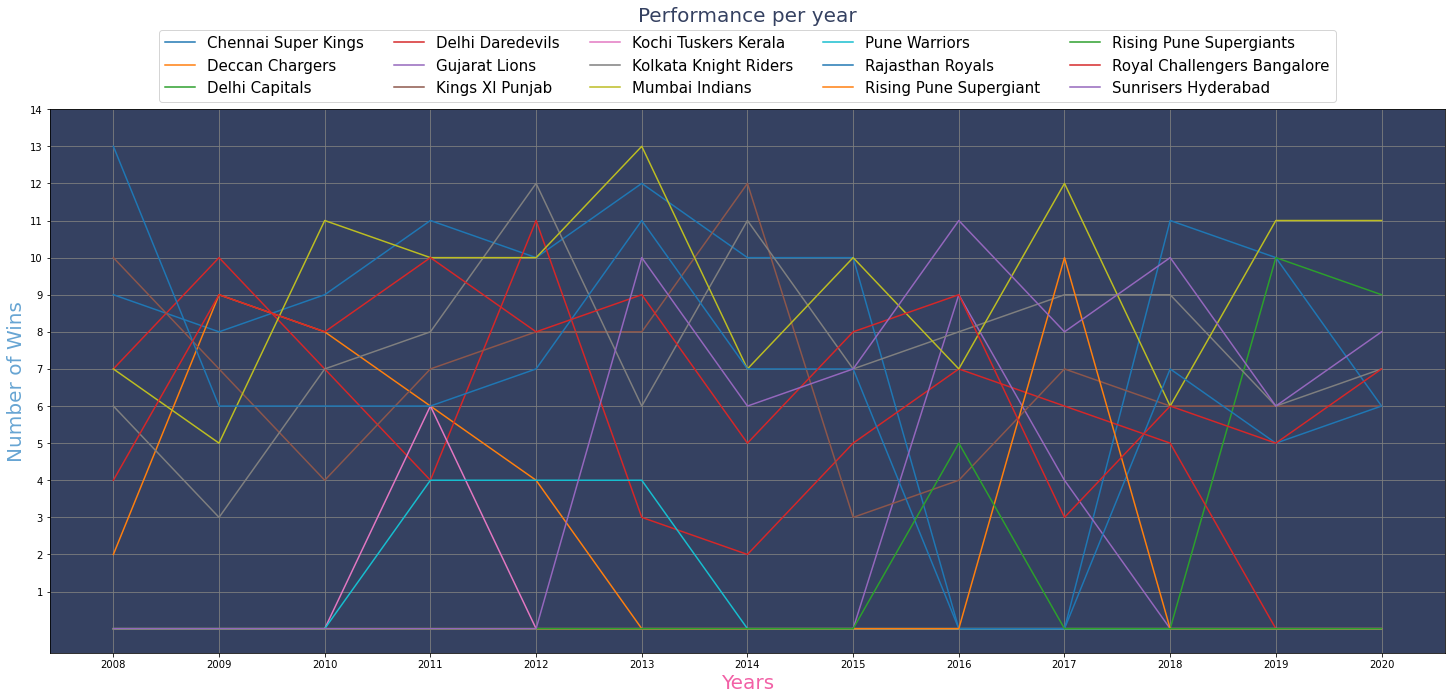

In [7]:
fulldate = pd.to_datetime(df['date'])
#print(fulldate)

# get year from the datetime value using dt.year
year = fulldate.dt.year

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot()

yearwisewin = pd.crosstab(year,df['winner'])

yearwisewin.plot(ax=ax1,kind='line',yticks=range(1,15),xticks=range(2008,2021)).grid(True,color='grey')

ax1.legend(loc="center",prop={'size': 15}, bbox_to_anchor=(0.5, 1.08), ncol=5)

ax1.set_ylabel('Number of Wins',size='20',color='#67a5d3')
ax1.set_xlabel('Years',size='20',color='#f261a6')
ax1.set_title('Performance per year',size='20',color='#354161',y=1.15)
ax1.set_facecolor("#354161")

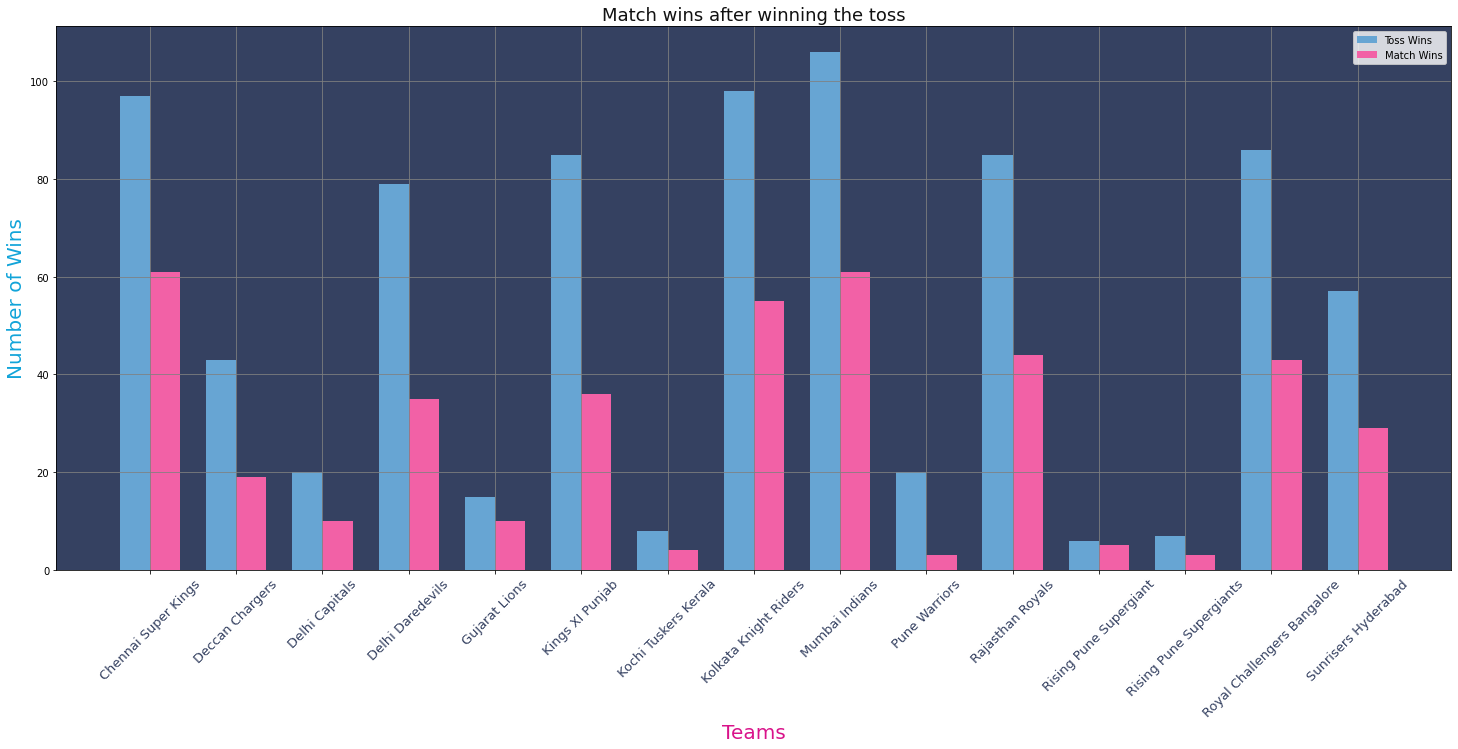

In [8]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()

#d = df['winner'].value_counts().sort_index()
#print(d)
#print(df['toss_winner'].value_counts().sort_index())

#d1 = sorted(set(df['winner']))
#print(d1)


filter = df['toss_winner']==df['winner']

#print(df['winner'][filter])
#print()
#print(df['winner'][filter].value_counts())


index = np.arange(15)
bar_width = 0.35

ax.bar(index,df['toss_winner'].value_counts().sort_index(),bar_width,color='#67a5d3')
ax.bar(index+bar_width,df['winner'][filter].value_counts().sort_index(),bar_width,color='#f261a6')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(sorted(set(df['winner'])),rotation='45',color='#354161',size='13')
ax.grid(color='grey')
ax.legend(['Toss Wins','Match Wins'])
ax.set_ylabel('Number of Wins',size='20',color='#12a4d9')
ax.set_xlabel('Teams',size='20',color='#d9138a')
ax.set_title('Match wins after winning the toss',color='#111111',size=18)
ax.set_facecolor("#354161")

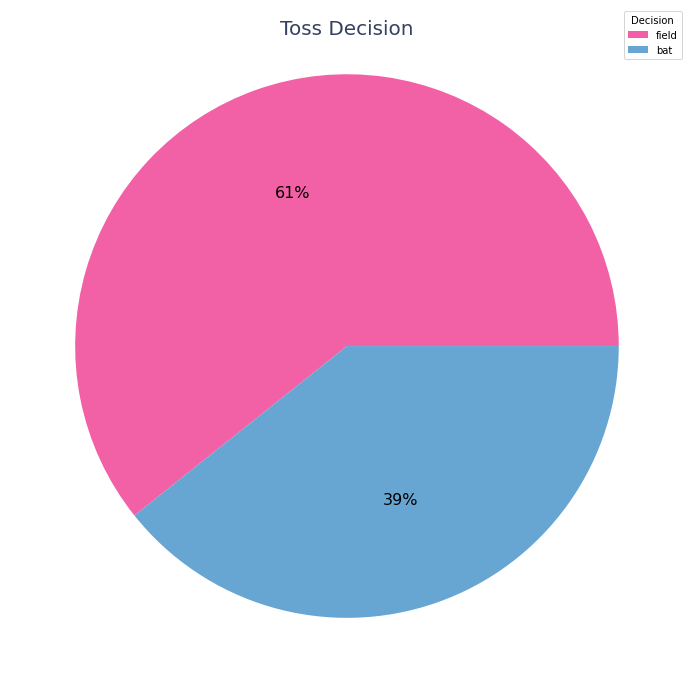

In [9]:
d = df['toss_decision'].value_counts()

#print(d)

fig = plt.figure(figsize=(25,12.5))
ax = fig.add_subplot()
ax.pie(d,autopct='%1.0f%%',textprops={'fontsize': 16},colors=['#f261a6','#67a5d3'])

ax.set_title('Toss Decision',size='20',color='#354161',y=0.95)
ax.legend(df['toss_decision'],title="Decision",loc="upper right")

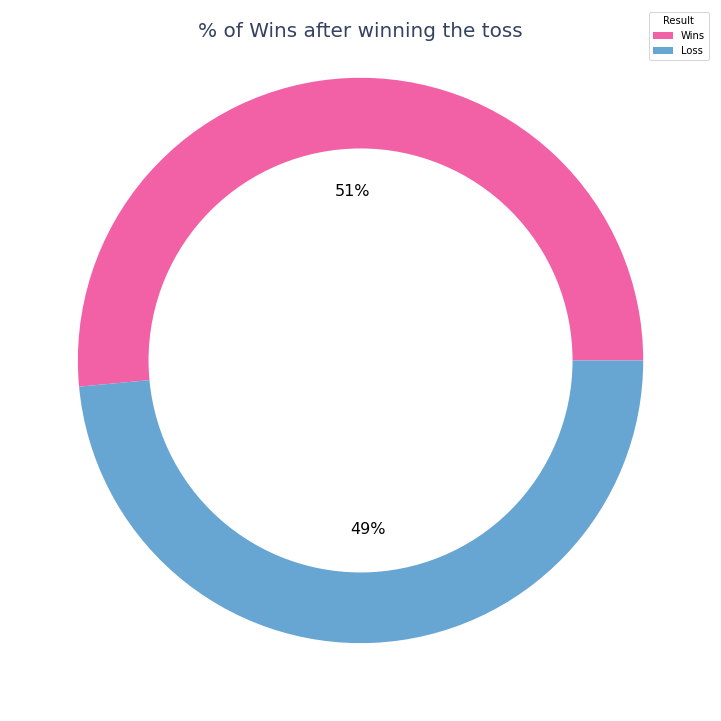

In [10]:
filter = df['toss_winner']==df['winner']
wins = df['toss_winner'][filter].value_counts().sum()
#print(wins)

filter = df['toss_winner']!=df['winner']
loss = df['toss_winner'][filter].value_counts().sum()
#print(loss)

fig = plt.figure(figsize=(25,13))
ax = fig.add_subplot()
ax.pie([wins,loss],autopct='%1.0f%%',textprops={'fontsize': 16},colors=['#f261a6','#67a5d3'])
ax.set_title('% of Wins after winning the toss',size='20',color='#354161',y=0.95)
ax.legend(['Wins','Loss'],title="Result",loc="upper right")

# To create donut chart from pie chart

circle = plt.Circle((0,0),0.75,fc='white') #draw circle for look like donut chart
donut = plt.gcf()
donut.gca().add_artist(circle)
#plt.axis('equal')


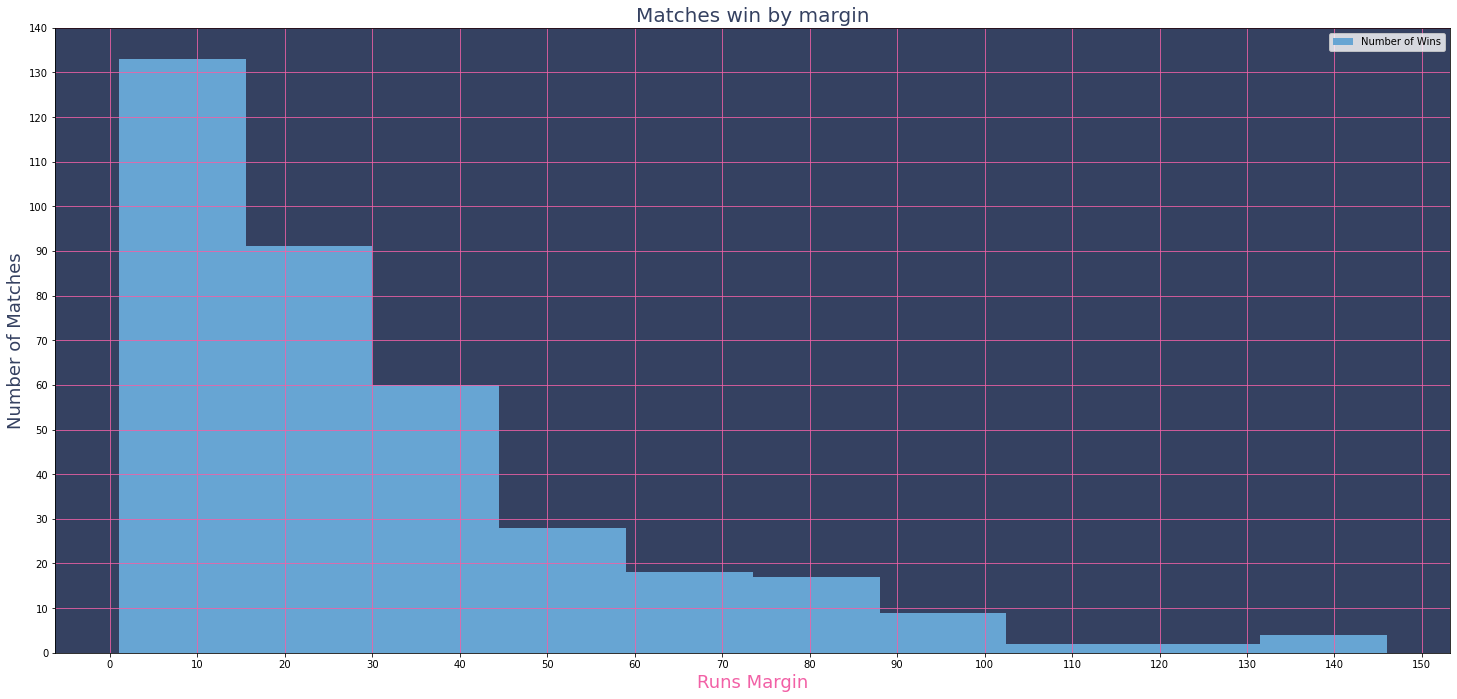

In [11]:
fig = plt.figure(figsize=(25,11.5))
ax = fig.add_subplot()

filter = df['result']=="runs"
df = df.dropna(subset=['result_margin'])
result_margin = df['result_margin'][filter]
#print(result_margin)
#result_margin.describe()

#ax.hist(result_margin)

#result_margin.plot(kind='hist',color='aqua')

bar_width = 0.35

ax.hist(result_margin,color='#67a5d3')

#ax.set_xticks(index + bar_width / 2)
#ax.set_xticklabels(sorted(set(df['winner'])),rotation='vertical')
ax.set_xticks([*range(0,151,10)])
ax.set_yticks([*range(0,146,10)])
ax.grid(color='#f261a6')
ax.legend(['Number of Wins'])
ax.set_ylabel('Number of Matches',size='18',color='#354161')
ax.set_xlabel('Runs Margin',size='18',color='#f261a6')
ax.set_title('Matches win by margin',color='#354161',size='20')
ax.set_facecolor("#354161")

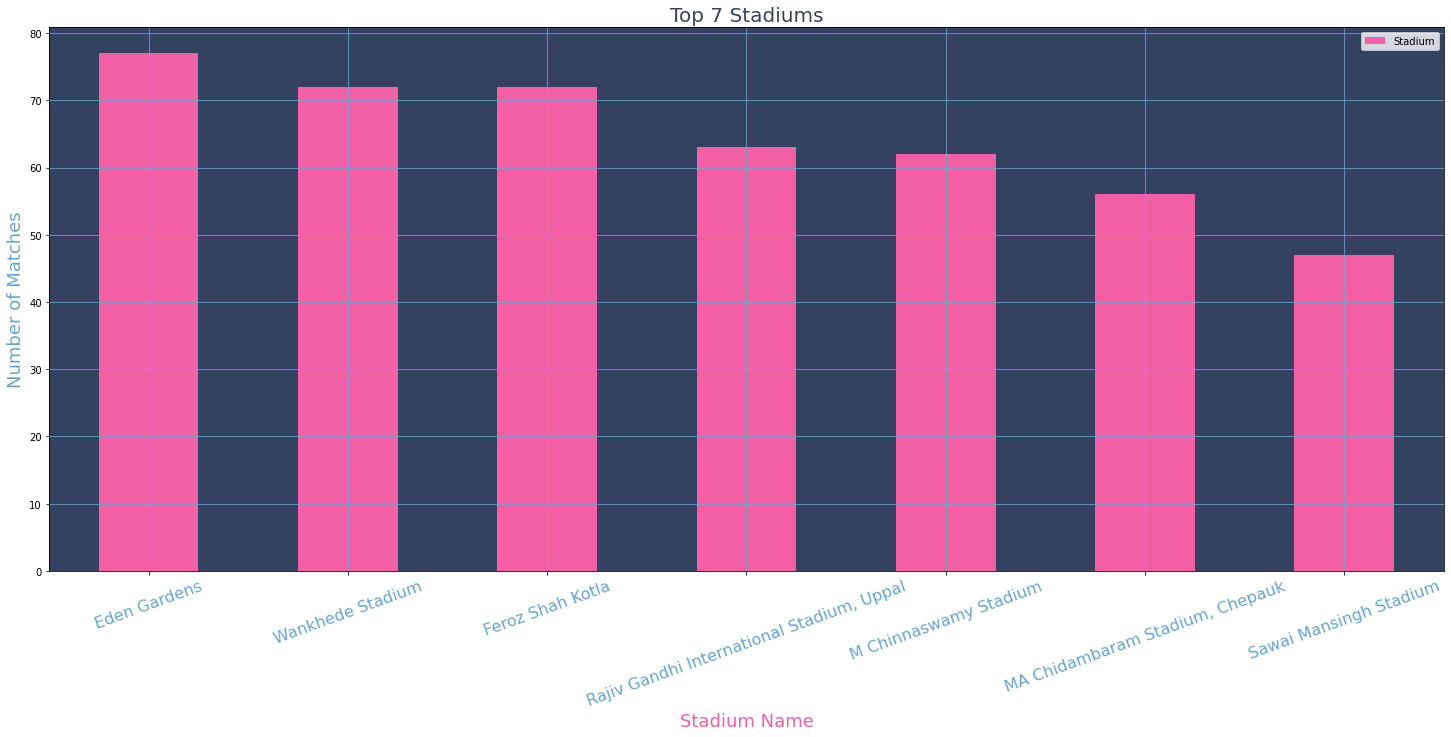

In [12]:
venue = df['venue'].value_counts().head(7)

venue_name = list(venue.keys())
#print(venue_name)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()

venue.plot(kind='bar',color='#f261a6')

ax.set_xticklabels(venue.keys(),rotation=20,size=16,color='#67a5d3')
ax.grid(color='#67a5d3')
ax.legend(['Stadium'])
ax.set_ylabel('Number of Matches',size='18',color='#67a5d3')
ax.set_xlabel('Stadium Name',size='18',color='#f261a6')
ax.set_title('Top 7 Stadiums',color='#354161',size='20')
ax.set_facecolor("#354161")

Text(0.5, 0.95, 'Top 7 umpires compared to others')

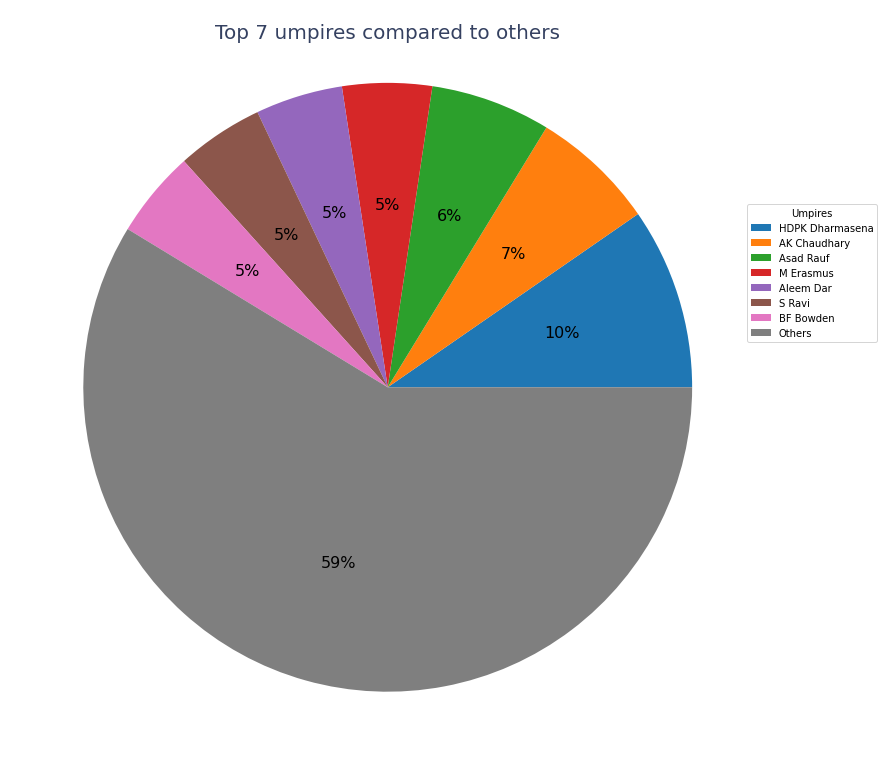

In [13]:
umpire = df['umpire1'].value_counts()
#print(umpire)

top7_umpires = umpire.head(7)
top7_total = top7_umpires.sum()

other_umpires_total = umpire.sum() - top7_total

#print(top7_umpires)
#print(top7_total)
#print(other_umpires_total)

top7_umpires = dict(top7_umpires)
#print(top7_umpires)
top7_umpires.update({'Others':other_umpires_total})
#print(top7_umpires)

fig = plt.figure(figsize=(25,14))
ax = fig.add_subplot()
ax.pie(top7_umpires.values(),autopct='%1.0f%%',textprops={'fontsize': 16})
ax.legend(top7_umpires.keys(),title="Umpires",loc="right",bbox_to_anchor=(1.15,0.650))
ax.set_title('Top 7 umpires compared to others',size='20',color='#354161',y=0.95)

In [14]:
filter = df['result']=="runs"
df = df.dropna(subset=['result_margin'])
result_margin = df['result_margin'][filter]
#print(result_margin)
# We need to convert the result into pandas dataframe.. so we can use the style.set_properties.. becasue it only applies on pandas datasets.
des = pd.DataFrame(result_margin.describe())

# We need to convert the rows to columns and columns to rows, so it's easy to see
des = des.transpose()
des.style.set_properties(**{'background-color': '#354161', 
                           'color': '#f261a6','height':'200px','width':'180px'})

,count,mean,std,min,25%,50%,75%,max
result_margin,364.000000,30.508242,27.319605,1.000000,11.750000,22.000000,40.250000,146.000000


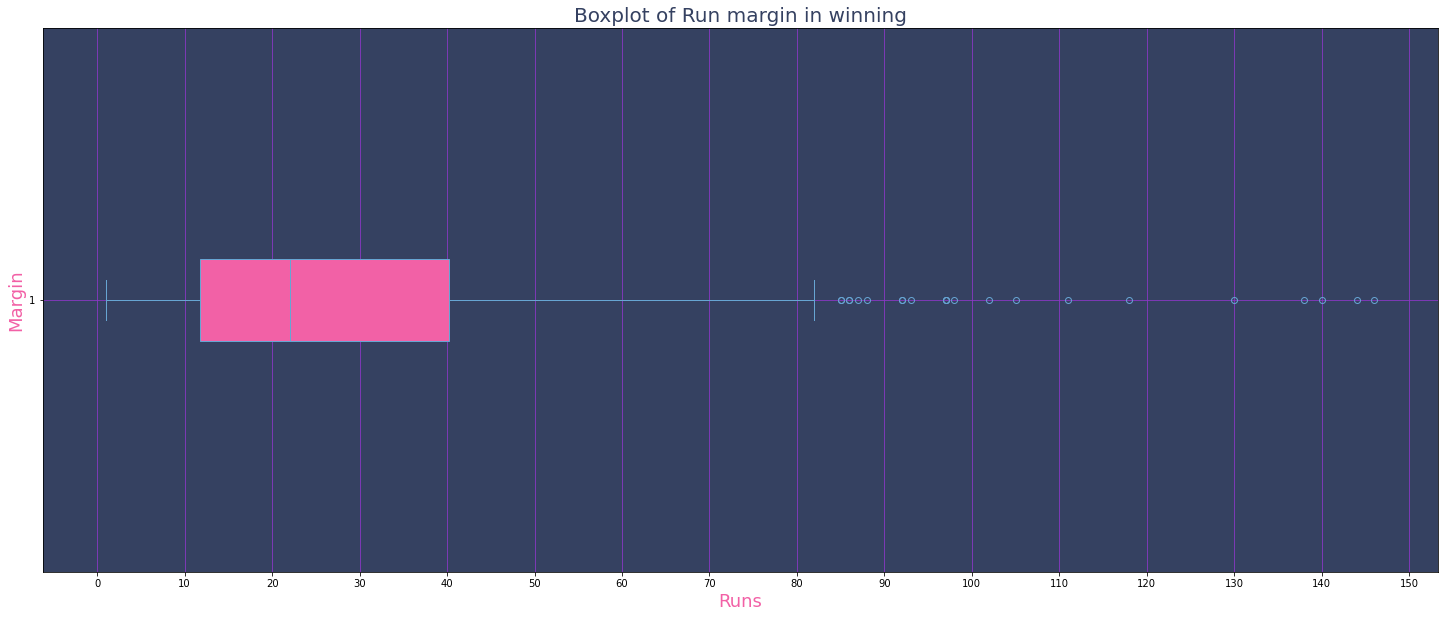

In [15]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()

# to set the color inside boxplot.. use boxprops , patch_artist, capprops etc..
ax.boxplot(result_margin,vert=False,patch_artist=True,boxprops=dict(facecolor='#f261a6',color='#67a5d3'),capprops=dict(color='#67a5d3'),whiskerprops=dict(color='#67a5d3'),medianprops=dict(color='#67a5d3'),flierprops=dict(color='#67a5d3',markeredgecolor='#67a5d3'))

ax.set_xticks([*range(0,160,10)])
ax.grid(color='#8D38C9')
#ax.legend(['Number of Wins'])
ax.set_ylabel('Margin',size='18',color='#f261a6')
ax.set_xlabel('Runs',size='18',color='#f261a6')
ax.set_title('Boxplot of Run margin in winning',color='#354161',size='20')
ax.set_facecolor("#354161")

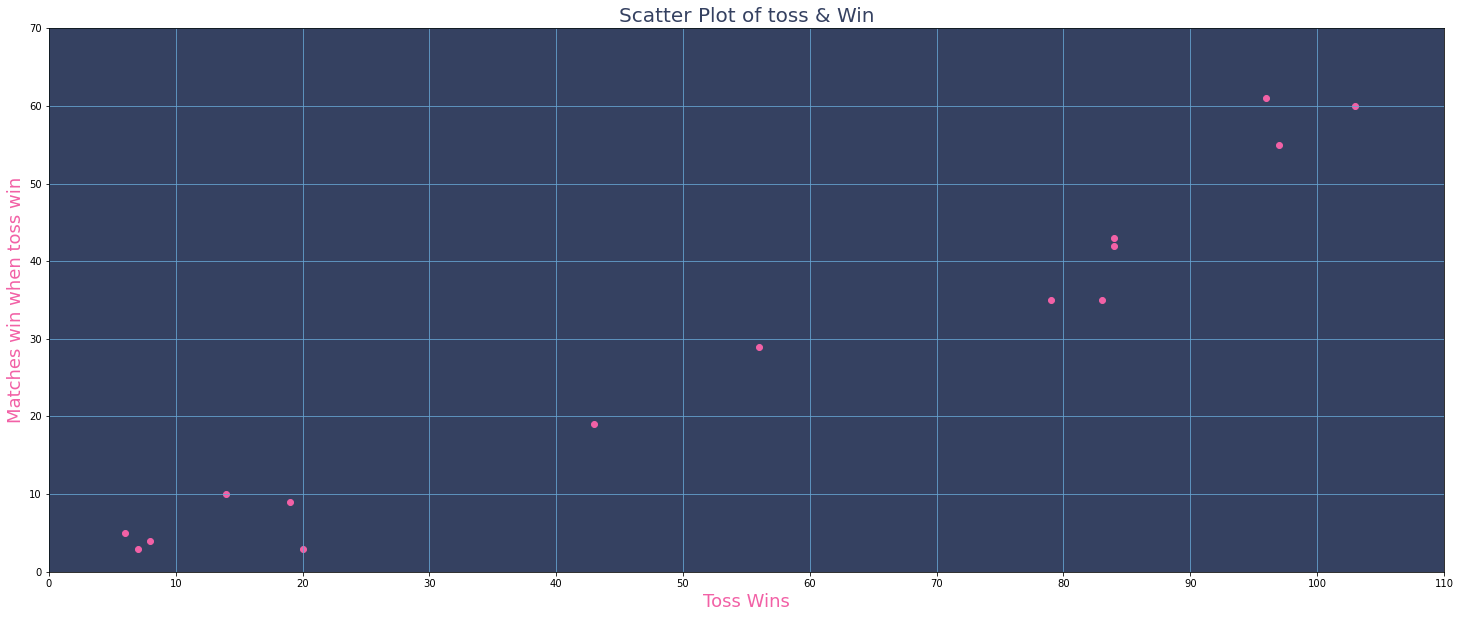

In [16]:
toss_winner = df['toss_winner'].value_counts().sort_index()
filter = df['toss_winner']==df['winner']
match_winner = df['winner'][filter].value_counts().sort_index()

#print(toss_winner)
#print(match_winner)

fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()

ax.scatter(toss_winner,match_winner,color='#f261a6')

ax.set_xticks([*range(0,120,10)])
ax.set_yticks([*range(0,80,10)])
ax.grid(color='#67a5d3')
#ax.legend(['Number of Wins'])
ax.set_ylabel('Matches win when toss win',size='18',color='#f261a6')
ax.set_xlabel('Toss Wins',size='18',color='#f261a6')
ax.set_title('Scatter Plot of toss & Win',color='#354161',size='20')
ax.set_facecolor("#354161")

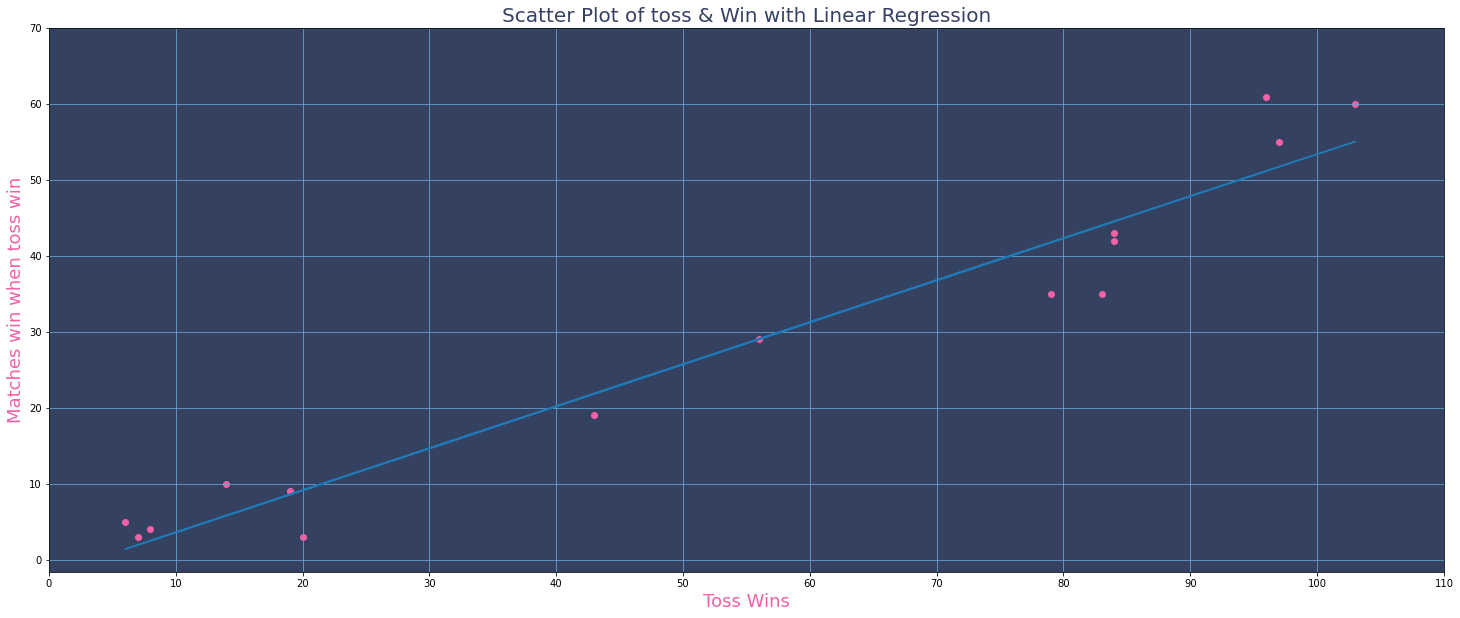

In [17]:
toss_winner = np.array(df['toss_winner'].value_counts().sort_index())
filter = df['toss_winner']==df['winner']
match_winner = np.array(df['winner'][filter].value_counts().sort_index())

#print(toss_winner)
#print(match_winner)



from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

toss_winner = toss_winner.reshape(-1,1)
match_winner = match_winner.reshape(-1,1)
regressor.fit(toss_winner,match_winner)

winner_predict = regressor.predict(toss_winner)
#print(winner_predict)
#print(match_winner)


fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot()

ax.scatter(toss_winner,match_winner,color='#f261a6')
ax.plot(toss_winner,winner_predict)
ax.set_xticks([*range(0,120,10)])
ax.set_yticks([*range(0,80,10)])
ax.grid(color='#67a5d3')
#ax.legend(['Number of Wins'])
ax.set_ylabel('Matches win when toss win',size='18',color='#f261a6')
ax.set_xlabel('Toss Wins',size='18',color='#f261a6')
ax.set_title('Scatter Plot of toss & Win with Linear Regression',color='#354161',size='20')
ax.set_facecolor("#354161")





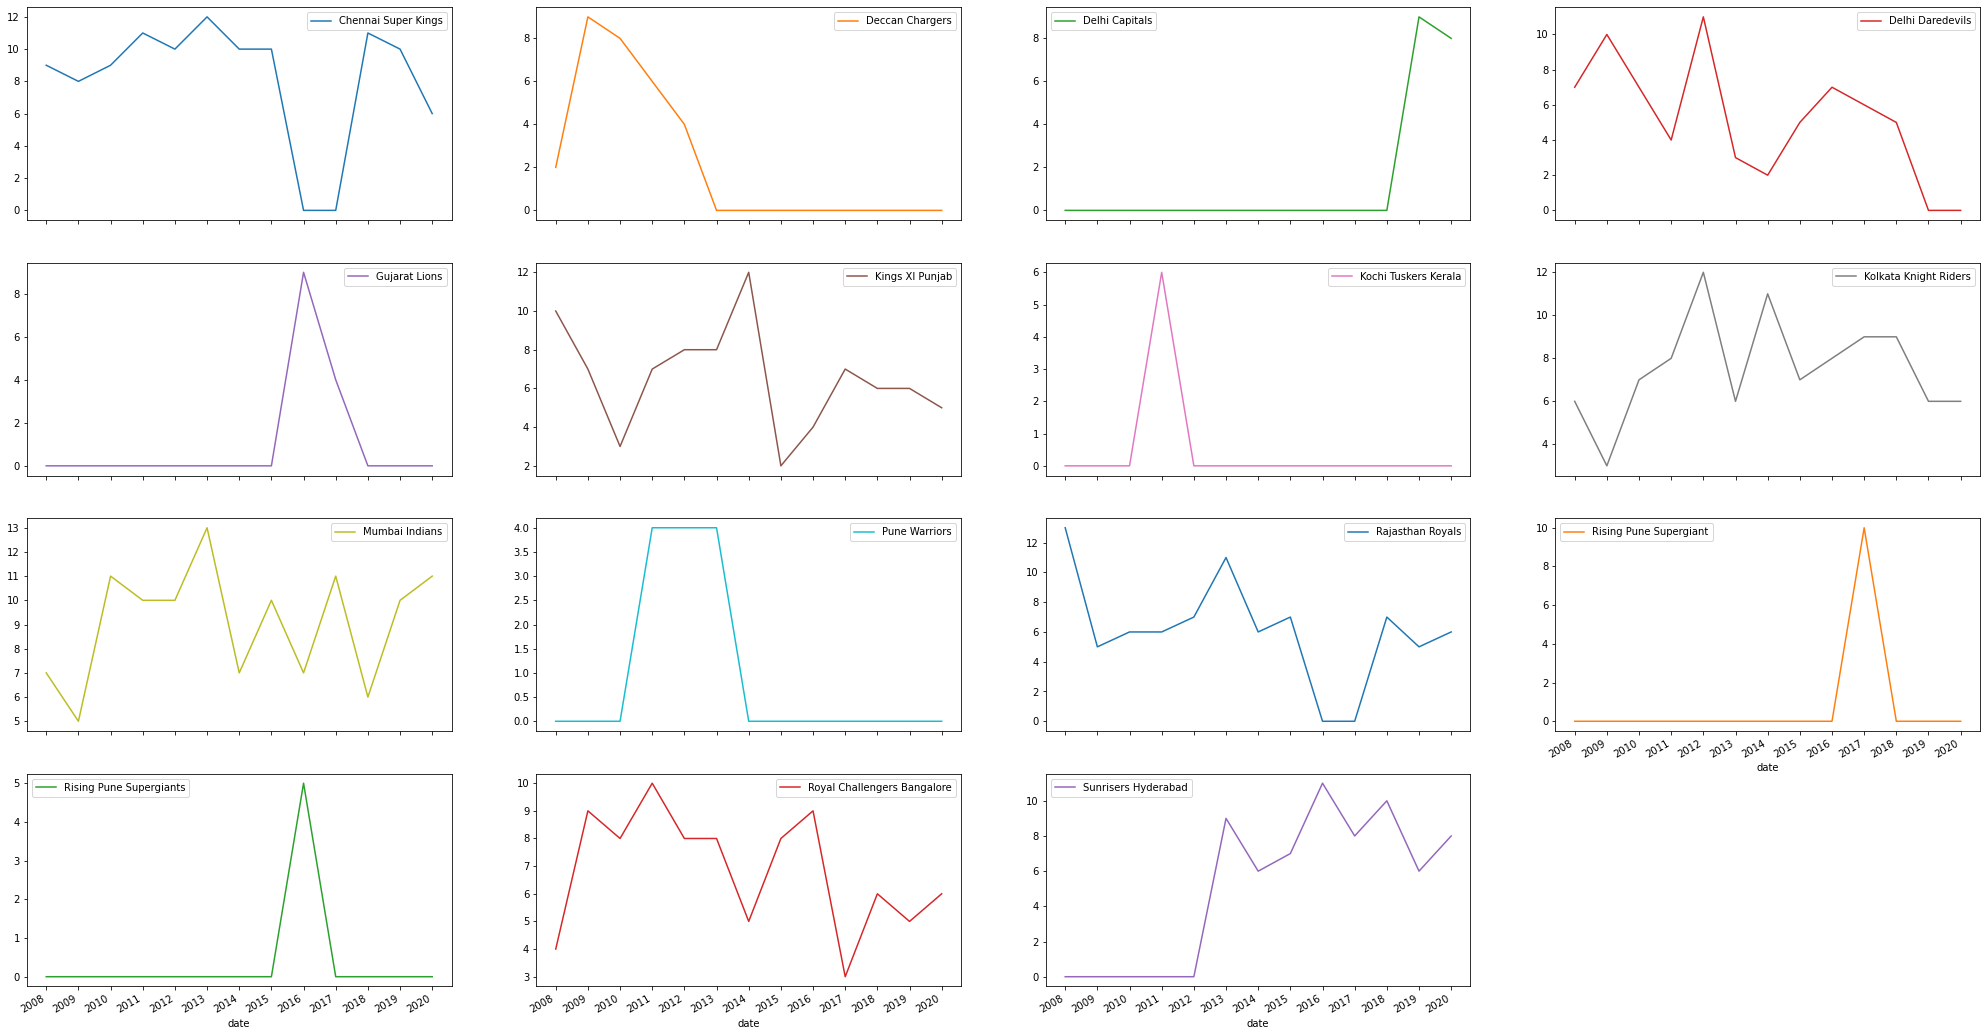

In [18]:
#fig = plt.figure(figsize=(35,20))
#ax = fig.add_subplot()

yearwisewin = pd.crosstab(year,df['winner'])

yearwisewin.plot(figsize=(35,20),kind='line',subplots=True,layout=(4,4),xticks=range(2008,2021))

# to give color for multiple subplots.... use this
plt.rcParams['axes.facecolor'] = 'white'
#plt.rcParams["figure.facecolor"] = 'white'
#plt.rcParams["savefig.facecolor"] = '#354161'